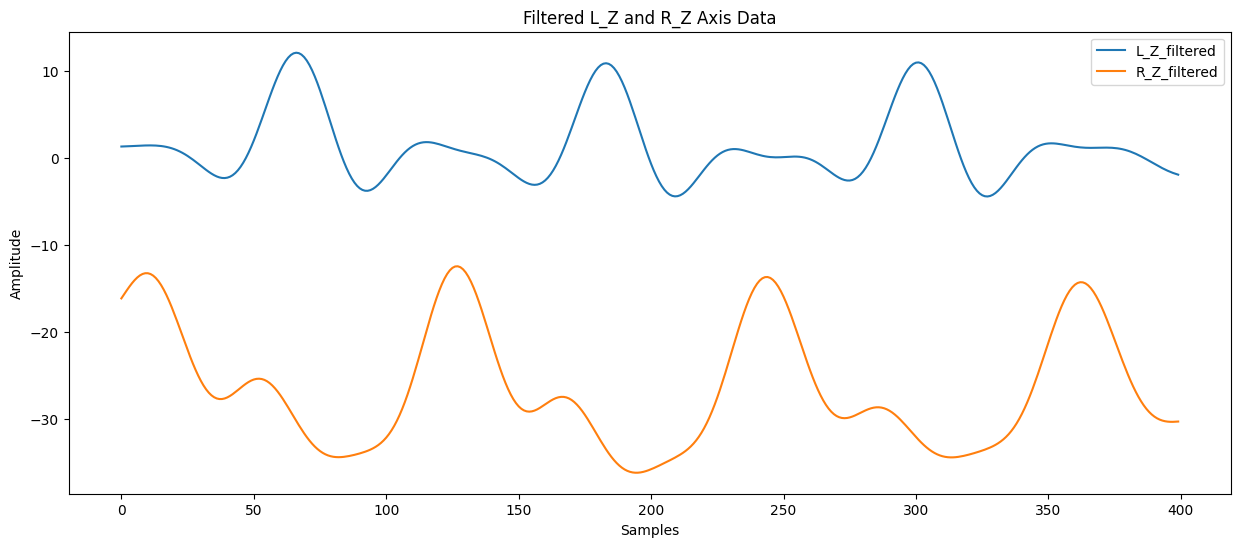

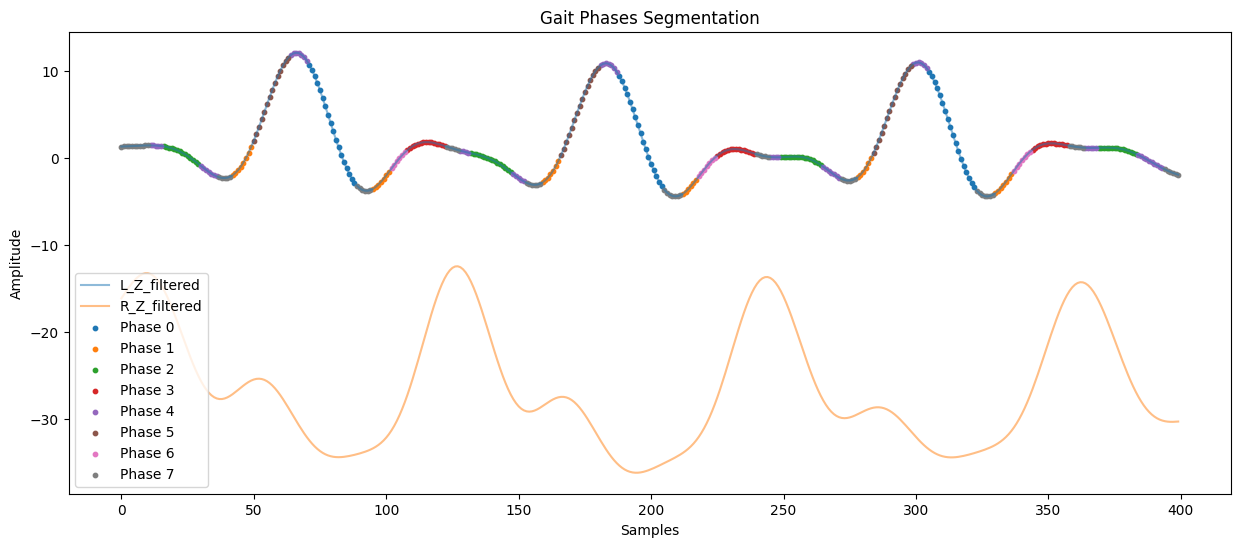

2000

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt
from sklearn.cluster import KMeans

# Load the CSV file
file_path = '../data/kineticsProsthesis/1.csv'  # Replace with the actual file path if different
data = pd.read_csv(file_path)

# Skip the first and last 1000 records, then select the middle 2000 records
sampling_rate = 100  # Hz
skip_seconds = 10
skip_records = skip_seconds * sampling_rate
display_records = 400  # Number of records to display in the middle

filtered_data = data.iloc[skip_records:-skip_records]
mid_index = len(filtered_data) // 2
start_index = max(0, mid_index - display_records // 2)
end_index = min(len(filtered_data), mid_index + display_records // 2)
display_data = filtered_data.iloc[start_index:end_index]

# Extract L_Z and R_Z
L_Z = display_data['L_Z'].values
R_Z = display_data['R_Z'].values

# Apply a low-pass filter to smooth the signal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

cutoff = 3  # Cutoff frequency in Hz
L_Z_filtered = butter_lowpass_filter(L_Z, cutoff, sampling_rate)
R_Z_filtered = butter_lowpass_filter(R_Z, cutoff, sampling_rate)

# Plot filtered signals
plt.figure(figsize=(15, 6))
plt.plot(L_Z_filtered, label='L_Z_filtered')
plt.plot(R_Z_filtered, label='R_Z_filtered')
plt.legend()
plt.title('Filtered L_Z and R_Z Axis Data')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

# Feature extraction - first derivative
L_Z_derivative = np.gradient(L_Z_filtered)
R_Z_derivative = np.gradient(R_Z_filtered)

# Identify zero-crossings and turning points
def zero_crossings(data):
    return np.where(np.diff(np.sign(data)))[0]

L_Z_zero_crossings = zero_crossings(L_Z_derivative)
R_Z_zero_crossings = zero_crossings(R_Z_derivative)

# Clustering to identify gait phases
features = np.vstack((L_Z_derivative, R_Z_derivative)).T
kmeans = KMeans(n_clusters=8)  # Assuming 8 gait phases as per the image
kmeans.fit(features)
labels = kmeans.labels_

# Plotting the segmented gait cycles
plt.figure(figsize=(15, 6))
plt.plot(L_Z_filtered, label='L_Z_filtered', alpha=0.5)
plt.plot(R_Z_filtered, label='R_Z_filtered', alpha=0.5)
for phase in range(8):
    phase_indices = np.where(labels == phase)[0]
    plt.scatter(phase_indices, L_Z_filtered[phase_indices], label=f'Phase {phase}', s=10)
plt.legend()
plt.title('Gait Phases Segmentation')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()
2000